In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype("float")


In [36]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [38]:
df["customerID"].duplicated().sum()

np.int64(0)

In [39]:
def conv(value):
   if value == 1:
    return "yes"
   else:
    return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

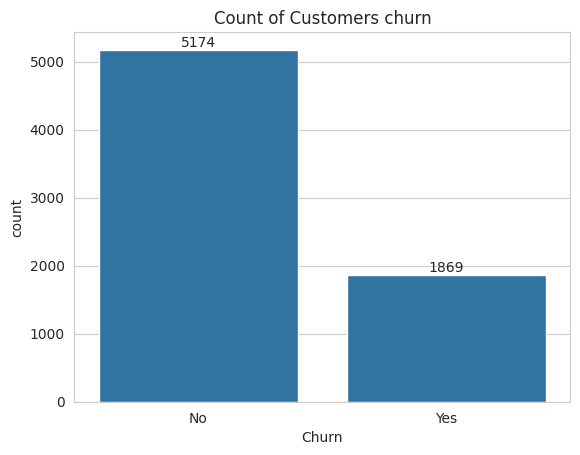

In [40]:
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title ("Count of Customers churn")
plt.show()


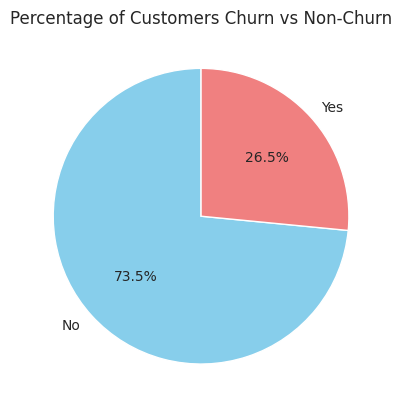

In [41]:
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Customers Churn vs Non-Churn')
plt.show()

In [43]:
# From the given pie chart you can conclude that 26.5% people churn from the services.

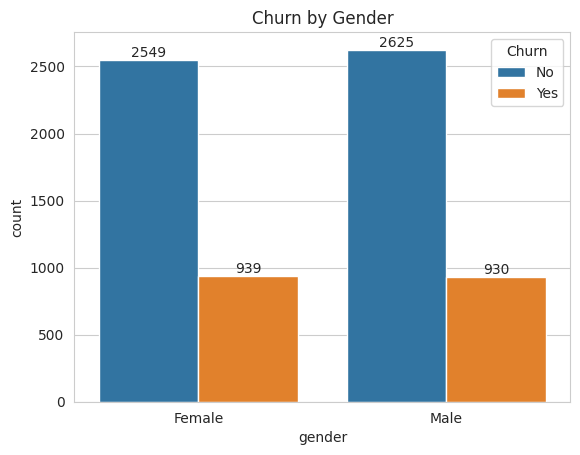

In [42]:
ax = sns.countplot(x ="gender", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn by Gender")
plt.show()

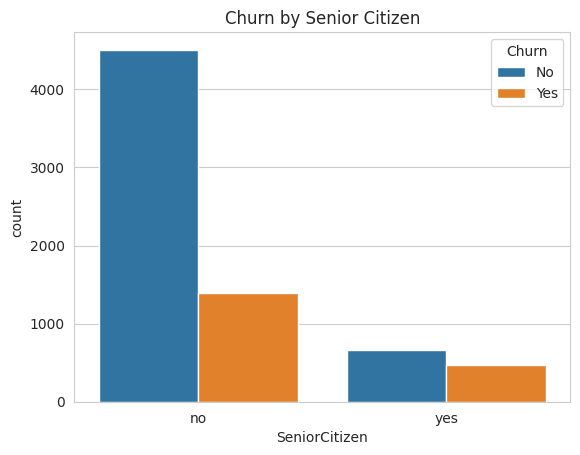

In [44]:
sns.countplot(x = "SeniorCitizen", data= df, hue = "Churn")
plt.title("Churn by Senior Citizen")
plt.show()

In [45]:
# Greater percentage of senior citizen have churned out.

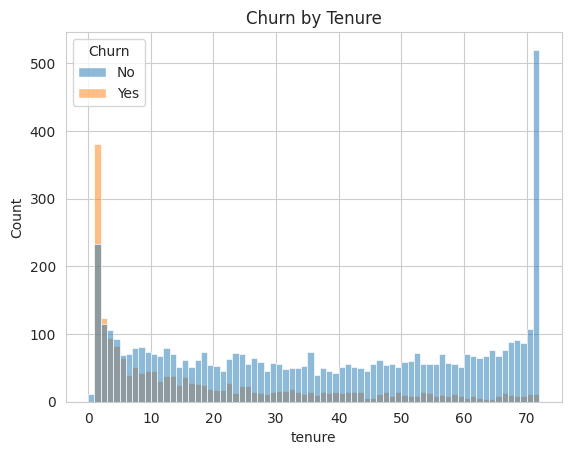

In [50]:
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.title("Churn by Tenure")
plt.show()

In [ ]:
# People who have used our services for a long time  have stayed, people who have used our servicesfpr 1 or 2 months have churned.

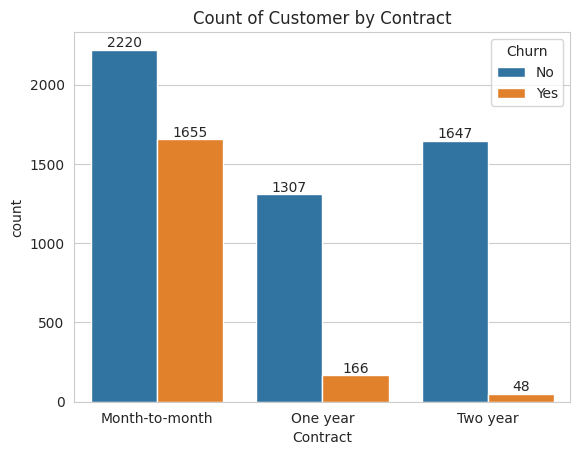

In [51]:
ax = sns.countplot(x ="Contract", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Customer by Contract")
plt.show()

In [52]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

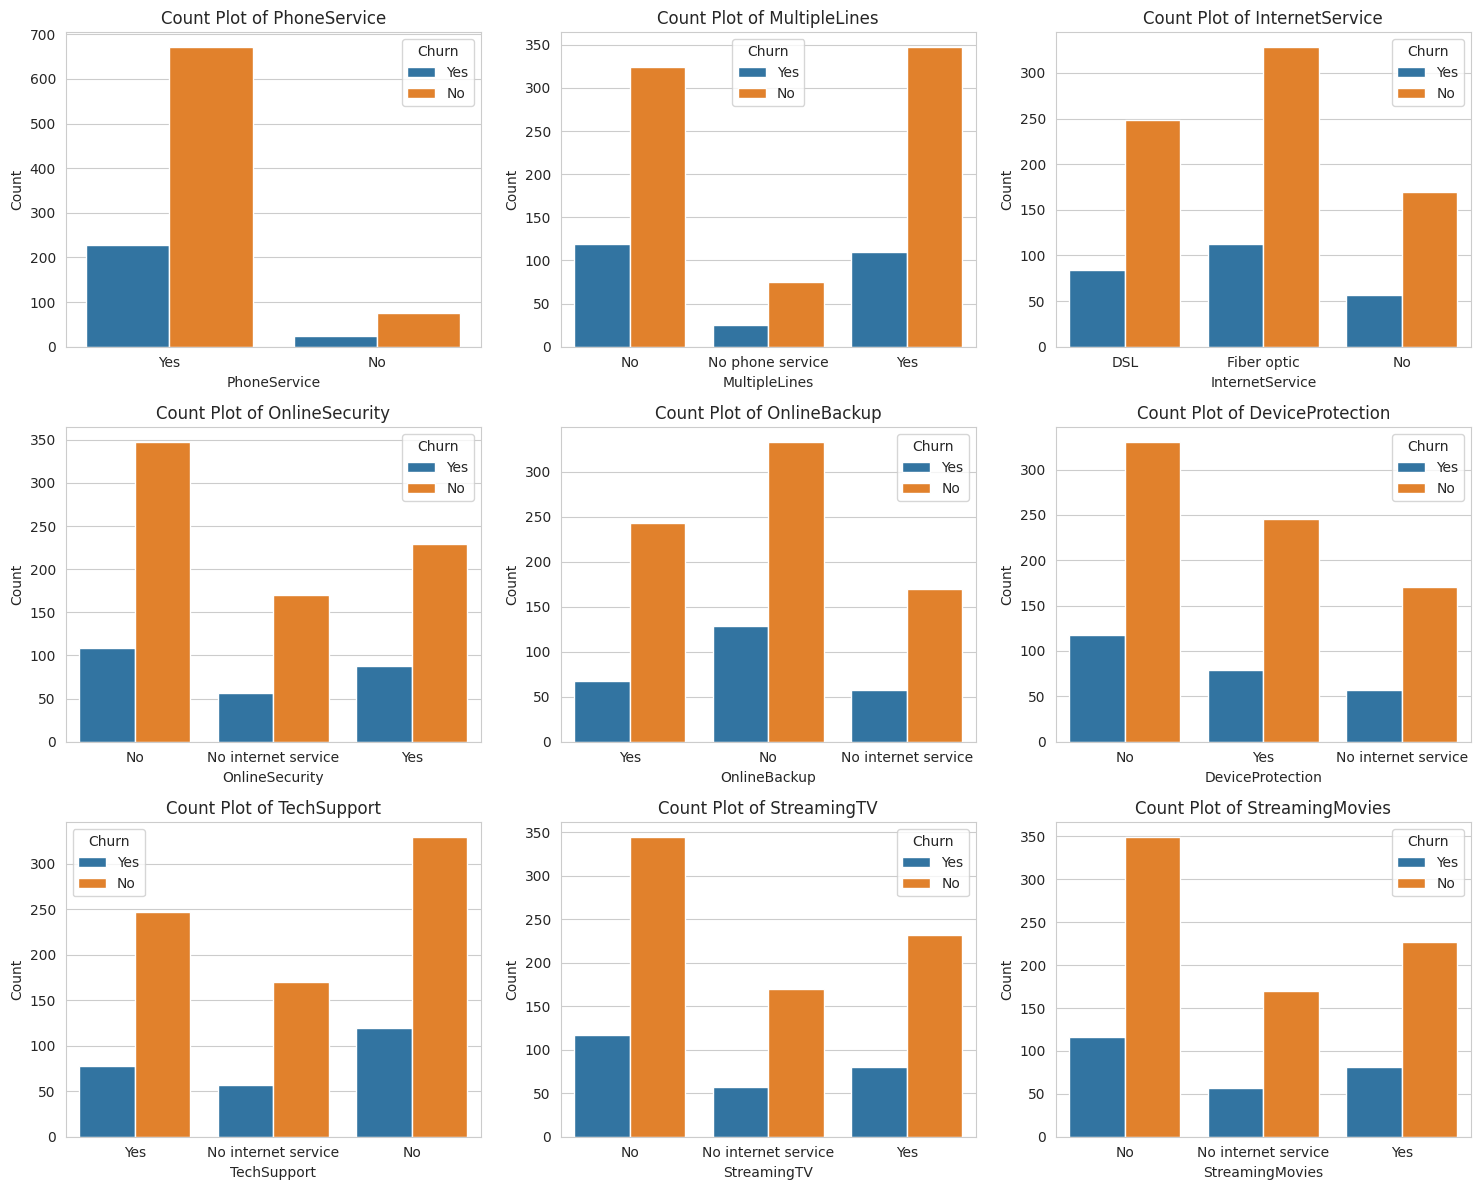

In [54]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [55]:
# The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

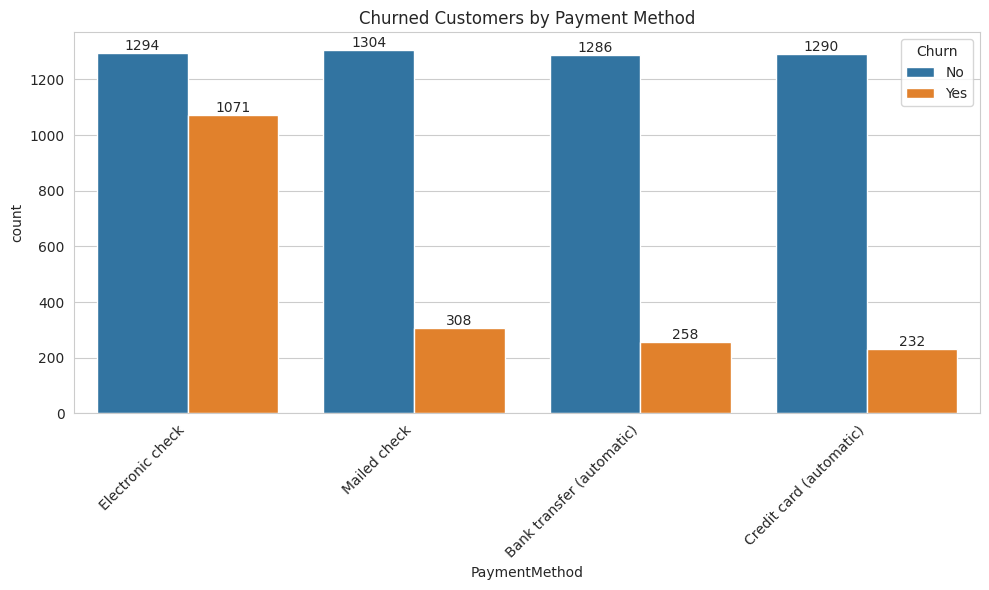

In [69]:
# Reload the original dataframe to ensure all columns are available
df_full = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert 'TotalCharges' to numeric, coercing errors
df_full["TotalCharges"] = df_full["TotalCharges"].replace(" ",0).astype("float")

# Convert 'SeniorCitizen' to 'yes'/'no' as done previously
def conv(value):
   if value == 1:
    return "yes"
   else:
    return "no"
df_full["SeniorCitizen"] = df_full["SeniorCitizen"].apply(conv)


plt.figure(figsize = (10,6))
ax = sns.countplot(x = "PaymentMethod", data = df_full, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45, ha = 'right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Customer is likely to churned if using electronic check as payment method**